# PUI midterm

## Part 1: Multiple choice and theoretic questions
Please write and explain your answer after each question

### Question 1. What would the p-value of 0.04 mean for t-test comparing two samples of observations (select all that applies):
A) sample averages are at least 4% different

B) sample averages are the same

C) sample averages are different

D) one can reject the null hypothesis that the samples follows the underlying distributions with the same mean at 5% significance level (or with 95% confidence) since p-values is below 0.05

E) one can't reject the null hypothesis that the samples follows the underlying distributions with the same mean at 5% significance level (or 95% confidence) singe p-value does not reach 0.05

F) one can reject the null hypothesis that the samples follows the underlying distributions with the different means at 5% significance level (or 95% confidence)

G) probability that two samples have the same means is 4%

Answer: D、G
Explain: A p-value equal to 0.04 indicates that the null hypothesis is rejected at the 95% confidence level and
2e accept the alternative hypothesis. Since we tested the same mean value, so choose the D and G.

### Question 2. What is true regarding normal and log-normal distributions (select all that applies):
A) Quantities following log-normal distributions have higher probabilities for outliers compared to normal distributions

B) Outliers significantly different from the mean are more common for the normally distributed variables compared to log normally distributed variables

C) Logarithm of the normally distributed quantity follow a log-normal distribution

D) Logarithm of the log-normally distributed quantity follows a normal distribution

E) Probability density function of the log-normally distributed variable equals to the logarithm of the probability density function of the normally distributed variable

Answer:A，D
Explain: The log-normal distributions are tested by first taking the logarithm of the sample values and then performing a normal distribution test. The outliers depend on the sample itself.They have different probability density functions.

### Question 3. 
Imagine training a model which considers multiple sattelite images of urban traffic and tries to find groups of typical
(repeated with minor deviations) scenarios. How would you classify this problem from Machine Learning perspective?

A) Supervised leanring;

B) Unsupervised learning;

C) Semi-supervised learning;

D) Reinforcement learning.

Explain you choice:

Answer: B
Explain: Our training task is to perform classification that tries to find groups of typical (repeated with minor deviations). This is a unsupervised learning leanring task.Since we do not know the prior image classification category, this is an unsupervised learning task.

### Question 4. 
Please explain why would you need separate training, validation and test samples to learn the model. In which cases you may need all three, including a validation sample?

Answer: Three datasets are typically used in different stages of model creation: the training set, the validation set, and the test set. The training dataset is used to build a classifier by matching some parameters. The validation dataset adjusts the parameters of the classifier for the learned model, such as selecting the number of hidden units in the neural network. The validation set is also used to determine the network structure or parameters that control the complexity of the model. Test the discriminatory ability of the trained model. The test dataset dataset is completely separated from the training and validation sets and is not involved in model training, but tests the performance of the final selected optimal model. The purpose of dividing the dataset is to prevent overfitting and to get a better model. The model evaluation result is definitely better than the actual one if the training and test sets are the same, but the generalization performance of the model is poorer.The reason is to prevent your model from overfitting and to accurately evaluate your model. 


Case：

The dataset partitioning criteria depends on two things: (1) the sample size of the dataset, and (2) the machine learning model being trained.


If the model parameters are small, then you can choose fewer validation set samples because there are fewer model parameters to optimize; if the model parameters are large, then you need many validation set samples to optimize the model parameters. Of course, if the selected model has no parameters, the validation set may not be necessary.

If the data set is small and not enough to divide the training set, validation set and test set, we adopt the cross-validation method to select the training set and validation set, because the model evaluated by the validation set is unbiased, and the cross-validation method is also a practical method when the data set is small




In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from dateutil import parser
import seaborn as sns
from scipy.stats import norm
from scipy.stats import genextreme as gev
from scipy.stats import pareto 
from scipy import stats
import geopandas as gpd
from shapely.geometry import Point
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Part 2: NYPD data analysis

In this part, you need to download New York Police Department (NYPD) complaints data for 2019 and write code for three following sections (each having own sub-sections): Data cleaning, Exploratory analysis and Hypothesis testing

###  download NYPD complaints data:
two options:
1. download with curl or urllib methods
2. download with API

you can also manually download here: https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i

In [2]:
#!curl https://data.cityofnewyork.us/api/views/qgea-i56i/rows.csv?accessType=DOWNLOAD > NYPD_data.csv

In [3]:
#!wget https://data.cityofnewyork.us/api/views/qgea-i56i/rows.csv?accessType=DOWNLOAD

In [4]:
#!wget https://www.dropbox.com/s/u78fk8g0wkf3xwu/NYPD_data.csv?dl=0

### read data

In [5]:
data = pd.read_csv('NYPD_data.csv')
data.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,506547392,03/29/2018,20:30:00,NaN,NaN,32.0,03/30/2018,351,CRIMINAL MISCHIEF & RELATED OF,254.0,...,NaN,NaN,40.810877,-73.941064,"(40.810877241, -73.941064151)",PATROL BORO MAN NORTH,NaN,25-44,WHITE,F
1,629632833,02/06/2018,23:15:00,NaN,NaN,52.0,02/07/2018,341,PETIT LARCENY,333.0,...,F,NaN,40.873671,-73.908014,"(40.873671035, -73.908013649)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,D
2,787203902,11/21/2018,00:15:00,11/21/2018,00:20:00,75.0,11/21/2018,341,PETIT LARCENY,321.0,...,F,NaN,40.651782,-73.885457,"(40.651782232, -73.885456761)",PATROL BORO BKLYN NORTH,NaN,UNKNOWN,UNKNOWN,D
3,280364018,06/09/2018,21:42:00,06/09/2018,21:43:00,10.0,06/10/2018,361,OFF. AGNST PUB ORD SENSBLTY &,639.0,...,M,NaN,40.759310,-73.994706,"(40.759310399, -73.994706072)",PATROL BORO MAN SOUTH,NaN,18-24,WHITE HISPANIC,F
4,985800320,11/10/2018,19:40:00,11/10/2018,19:45:00,19.0,11/10/2018,341,PETIT LARCENY,333.0,...,F,NaN,40.764536,-73.970728,"(40.764535539, -73.970728388)",PATROL BORO MAN NORTH,NaN,UNKNOWN,UNKNOWN,D


In [6]:
data.shape

(7825499, 35)

In [7]:
data.columns

Index(['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'CMPLNT_TO_DT',
       'CMPLNT_TO_TM', 'ADDR_PCT_CD', 'RPT_DT', 'KY_CD', 'OFNS_DESC', 'PD_CD',
       'PD_DESC', 'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD', 'BORO_NM',
       'LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC', 'JURIS_DESC', 'JURISDICTION_CODE',
       'PARKS_NM', 'HADEVELOPT', 'HOUSING_PSA', 'X_COORD_CD', 'Y_COORD_CD',
       'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'TRANSIT_DISTRICT',
       'Latitude', 'Longitude', 'Lat_Lon', 'PATROL_BORO', 'STATION_NAME',
       'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX'],
      dtype='object')

The complete data dictionary is here: https://data.cityofnewyork.us/api/views/qgea-i56i/files/b21ec89f-4d7b-494e-b2e9-f69ae7f4c228?download=true&filename=NYPD_Complaint_Incident_Level_Data_Footnotes.pdf. 

The focus of this notebook would be on following columns - 'CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'OFNS_DESC', 'BORO_NM', 'PARKS_NM', 'Latitude', 'Longitude'.

The 'CMPLNT_NUM' is a unique id for each complaint, 'CMPLNT_FR_DT' and 'CMPLNT_FR_TM' are date and time of complaint respectively, 'OFNS_DESC' is the type of offence reported, 'BORO_NM' is name of borough where complaint was reported, 'PARKS_NM' is name of park where complaint recorded (if any) and 'Latitude', 'Longitude' are location of complaint.


## Section 1 - Data cleaning tasks
1. Drop rows with a) missing/wrong complaint date and time b) missing borough name and c) duplicate complaint number ('CMPLNT_NUM' column)
2. Filter out data where incident occured in a park or greenspace. Next, keep data for 2019 and after.
3. Keep specific crime categories - type 1 crimes defined by FBI: The list is given here https://ucr.fbi.gov/crime-in-the-u.s/2011/crime-in-the-u.s.-2011/offense-definitions
4. Filter by area (drop rows with location outside NYC)

### 1. filter out missing/wrong date and times, missing borough name and duplicate complaints from the data

In [8]:
# code here 
# make sure to convert date column to datetime
taxi=data
taxi['CMPLNT_FR_DT']=pd.to_datetime(taxi['CMPLNT_FR_DT'],errors = 'coerce')

#delete missing/wrong date and times
taxi=taxi.dropna(axis=0,subset=['CMPLNT_FR_DT'])
taxi=taxi.dropna(axis=0,subset=['CMPLNT_FR_TM'])

#delete missing borough name
taxi=taxi.dropna(axis=0,subset=['BORO_NM'])

#delete duplicate complaints
taxi.drop_duplicates(['CMPLNT_NUM'],inplace=True)
taxi.shape

(7808233, 35)

In [9]:
#keep the column only useful for the note book
taxi=taxi.loc[:,['CMPLNT_NUM','CMPLNT_FR_DT','CMPLNT_FR_TM','OFNS_DESC','BORO_NM','PARKS_NM','Latitude','Longitude']]
taxi.shape

(7808233, 8)

In [10]:
taxi.head(100)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,OFNS_DESC,BORO_NM,PARKS_NM,Latitude,Longitude
0,506547392,2018-03-29,20:30:00,CRIMINAL MISCHIEF & RELATED OF,MANHATTAN,NaN,40.810877,-73.941064
1,629632833,2018-02-06,23:15:00,PETIT LARCENY,BRONX,NaN,40.873671,-73.908014
2,787203902,2018-11-21,00:15:00,PETIT LARCENY,BROOKLYN,NaN,40.651782,-73.885457
3,280364018,2018-06-09,21:42:00,OFF. AGNST PUB ORD SENSBLTY &,MANHATTAN,NaN,40.759310,-73.994706
4,985800320,2018-11-10,19:40:00,PETIT LARCENY,MANHATTAN,NaN,40.764536,-73.970728
...,...,...,...,...,...,...,...,...
95,638521555,2017-12-14,09:00:00,HARRASSMENT 2,QUEENS,NaN,40.771101,-73.834498
96,867163549,2018-04-01,22:45:00,DANGEROUS WEAPONS,QUEENS,NaN,40.684246,-73.832420
97,980239890,2018-03-09,22:10:00,ROBBERY,QUEENS,NaN,40.700617,-73.909940
98,894161429,2018-02-25,19:58:00,CRIMINAL MISCHIEF & RELATED OF,MANHATTAN,NaN,40.728613,-74.005316


### 2. Remove rows where location is parks or greenspace and keep rows for 2019 and after

In [11]:
# parks name is in 'PARKS_NM' column. If a crime has occured outside a parkspace, this value would be NaN

taxi=taxi[taxi['PARKS_NM'].isnull()]
taxi

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,OFNS_DESC,BORO_NM,PARKS_NM,Latitude,Longitude
0,506547392,2018-03-29,20:30:00,CRIMINAL MISCHIEF & RELATED OF,MANHATTAN,NaN,40.810877,-73.941064
1,629632833,2018-02-06,23:15:00,PETIT LARCENY,BRONX,NaN,40.873671,-73.908014
2,787203902,2018-11-21,00:15:00,PETIT LARCENY,BROOKLYN,NaN,40.651782,-73.885457
3,280364018,2018-06-09,21:42:00,OFF. AGNST PUB ORD SENSBLTY &,MANHATTAN,NaN,40.759310,-73.994706
4,985800320,2018-11-10,19:40:00,PETIT LARCENY,MANHATTAN,NaN,40.764536,-73.970728
...,...,...,...,...,...,...,...,...
7825494,104527061,2008-05-01,18:55:00,DANGEROUS DRUGS,MANHATTAN,NaN,40.756788,-73.996540
7825495,284201488,2018-05-18,14:50:00,ASSAULT 3 & RELATED OFFENSES,STATEN ISLAND,NaN,40.577953,-74.102317
7825496,808565901,2018-11-19,02:25:00,GRAND LARCENY,QUEENS,NaN,40.743188,-73.862427
7825497,649441648,2018-02-03,10:02:00,HARRASSMENT 2,STATEN ISLAND,NaN,40.593665,-74.089000


In [12]:
## check the timeline of data

In [13]:
# remove data <2019
taxi=taxi[taxi['CMPLNT_FR_DT']>='2019-1-1']
taxi.shape

(1297955, 8)

### 3. keep type 1 crimes as defined by FBI from the data : 
https://ucr.fbi.gov/crime-in-the-u.s/2011/crime-in-the-u.s.-2011/offense-definitions

The crime type is present in the 'OFNS_DESC' column. You just need to keep the following categories: "'ARSON', 'BURGLARY', 'FELONY ASSAULT', 'GRAND LARCENY' ,'GRAND LARCENY OF MOTOR VEHICLE',
                'MURDER & NON-NEGL. MANSLAUGHTER', 'RAPE', 'ROBBERY'"

In [14]:
# code here
sysindex=(taxi['OFNS_DESC']=='ARSON')|(taxi['OFNS_DESC']=='BURGLARY')|(taxi['OFNS_DESC']=='FELONY ASSAULT')|(taxi['OFNS_DESC']=='GRAND LARCENY')|(taxi['OFNS_DESC']=='GRAND LARCENY OF MOTOR VEHICLE')|(taxi['OFNS_DESC']=='MURDER & NON-NEGL. MANSLAUGHTER')|(taxi['OFNS_DESC']=='RAPE')|(taxi['OFNS_DESC']=='ROBBERY')
taxi=taxi[sysindex]
taxi

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,OFNS_DESC,BORO_NM,PARKS_NM,Latitude,Longitude
681150,123171799,2021-12-31,21:15:00,FELONY ASSAULT,BRONX,NaN,40.817877,-73.865994
681170,725872999,2021-12-21,23:00:00,ARSON,BRONX,NaN,40.859744,-73.826259
681210,195931501,2019-12-30,19:20:00,GRAND LARCENY,MANHATTAN,NaN,40.759428,-73.973467
681252,696904327,2019-12-29,13:15:00,GRAND LARCENY OF MOTOR VEHICLE,BROOKLYN,NaN,40.674397,-73.951466
681332,730604096,2021-12-26,12:00:00,GRAND LARCENY,BRONX,NaN,40.824075,-73.908711
...,...,...,...,...,...,...,...,...
2555623,161753679,2020-01-01,18:05:00,ROBBERY,BRONX,NaN,40.823424,-73.901583
2555627,818450575,2020-01-09,23:45:00,GRAND LARCENY,BROOKLYN,NaN,40.614192,-73.933173
2555632,871565580,2020-01-05,19:30:00,ROBBERY,BRONX,NaN,40.887108,-73.913308
2555633,633539817,2020-01-09,16:14:00,GRAND LARCENY,MANHATTAN,NaN,40.725191,-73.998122


### 4. keep rows with location within NYC

zip codes file is present in the github 'Data' repository as "ZIPCODE.zip". You can also download the shapefile here: https://data.cityofnewyork.us/Business/Zip-Code-Boundaries/i8iw-xf4u/data?no_mobile=true .

Do a spatial joint to keep only rows within NYC

In [15]:
## zip codes map
zips = gpd.read_file('ZIP_CODE_040114/ZIP_CODE_040114.shp')
zips.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17..."


Note: 'ZIPCODE' column has unique codes. The borough name is given in 'COUNTY' column. The counties and boroughs are synonymous in NYC. 'New York' county corresponds to Manhattan, 'Kings' to Brooklyn, 'Richmond' to Staten Island

In [16]:
zips.COUNTY.unique()

array(['Queens', 'Kings', 'Bronx', 'New York', 'Richmond'], dtype=object)

<AxesSubplot:>

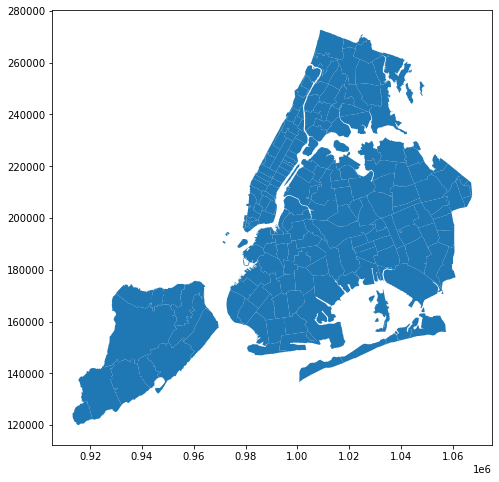

In [17]:
zips.plot(figsize=(8,8))

In [18]:
zips.crs

<Derived Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [19]:
zips.to_crs(4326,inplace=True)

In [20]:
geometry = [Point(xy) for xy in zip(taxi.Longitude, taxi.Latitude)]

taxi_gpd = gpd.GeoDataFrame(taxi[['CMPLNT_NUM','CMPLNT_FR_DT','CMPLNT_FR_TM','OFNS_DESC','BORO_NM','PARKS_NM','Latitude','Longitude']],
                                    geometry=geometry,crs={'init': 'epsg:4326'})
taxi_gpd


,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,OFNS_DESC,BORO_NM,PARKS_NM,Latitude,Longitude,geometry
681150,123171799,2021-12-31,21:15:00,FELONY ASSAULT,BRONX,NaN,40.817877,-73.865994,POINT (-73.86599 40.81788)
681170,725872999,2021-12-21,23:00:00,ARSON,BRONX,NaN,40.859744,-73.826259,POINT (-73.82626 40.85974)
681210,195931501,2019-12-30,19:20:00,GRAND LARCENY,MANHATTAN,NaN,40.759428,-73.973467,POINT (-73.97347 40.75943)
681252,696904327,2019-12-29,13:15:00,GRAND LARCENY OF MOTOR VEHICLE,BROOKLYN,NaN,40.674397,-73.951466,POINT (-73.95147 40.67440)
681332,730604096,2021-12-26,12:00:00,GRAND LARCENY,BRONX,NaN,40.824075,-73.908711,POINT (-73.90871 40.82407)
...,...,...,...,...,...,...,...,...,...
2555623,161753679,2020-01-01,18:05:00,ROBBERY,BRONX,NaN,40.823424,-73.901583,POINT (-73.90158 40.82342)
2555627,818450575,2020-01-09,23:45:00,GRAND LARCENY,BROOKLYN,NaN,40.614192,-73.933173,POINT (-73.93317 40.61419)
2555632,871565580,2020-01-05,19:30:00,ROBBERY,BRONX,NaN,40.887108,-73.913308,POINT (-73.91331 40.88711)
2555633,633539817,2020-01-09,16:14:00,GRAND LARCENY,MANHATTAN,NaN,40.725191,-73.998122,POINT (-73.99812 40.72519)


<AxesSubplot:>

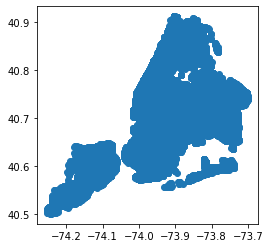

In [21]:
taxi_gpd.plot()

In [22]:
#Do a spatial joint to keep only rows within NYC
taxi_df = gpd.sjoin(taxi_gpd,zips,op='within',how='left')
taxi_df

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,OFNS_DESC,BORO_NM,PARKS_NM,Latitude,Longitude,geometry,index_right,...,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN
681150,123171799,2021-12-31,21:15:00,FELONY ASSAULT,BRONX,NaN,40.817877,-73.865994,POINT (-73.86599 40.81788),40.0,...,Bronx,58284.0,5.952235e+07,NY,Bronx,36,005,http://www.usps.com/,0.0,0.0
681170,725872999,2021-12-21,23:00:00,ARSON,BRONX,NaN,40.859744,-73.826259,POINT (-73.82626 40.85974),15.0,...,Bronx,40931.0,3.863330e+07,NY,Bronx,36,005,http://www.usps.com/,0.0,0.0
681210,195931501,2019-12-30,19:20:00,GRAND LARCENY,MANHATTAN,NaN,40.759428,-73.973467,POINT (-73.97347 40.75943),193.0,...,New York,33135.0,1.272834e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0
681252,696904327,2019-12-29,13:15:00,GRAND LARCENY OF MOTOR VEHICLE,BROOKLYN,NaN,40.674397,-73.951466,POINT (-73.95147 40.67440),183.0,...,Brooklyn,53862.0,2.647823e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0
681332,730604096,2021-12-26,12:00:00,GRAND LARCENY,BRONX,NaN,40.824075,-73.908711,POINT (-73.90871 40.82407),34.0,...,Bronx,89390.0,2.993345e+07,NY,Bronx,36,005,http://www.usps.com/,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2555623,161753679,2020-01-01,18:05:00,ROBBERY,BRONX,NaN,40.823424,-73.901583,POINT (-73.90158 40.82342),34.0,...,Bronx,89390.0,2.993345e+07,NY,Bronx,36,005,http://www.usps.com/,0.0,0.0
2555627,818450575,2020-01-09,23:45:00,GRAND LARCENY,BROOKLYN,NaN,40.614192,-73.933173,POINT (-73.93317 40.61419),132.0,...,Brooklyn,85853.0,2.062010e+08,NY,Kings,36,047,http://www.usps.com/,0.0,0.0
2555632,871565580,2020-01-05,19:30:00,ROBBERY,BRONX,NaN,40.887108,-73.913308,POINT (-73.91331 40.88711),14.0,...,Bronx,70641.0,3.670338e+07,NY,Bronx,36,005,http://www.usps.com/,0.0,0.0
2555633,633539817,2020-01-09,16:14:00,GRAND LARCENY,MANHATTAN,NaN,40.725191,-73.998122,POINT (-73.99812 40.72519),95.0,...,New York,24276.0,9.193739e+06,NY,New York,36,061,http://www.usps.com/,0.0,0.0


In [23]:
taxi_df=taxi_df.dropna(subset=['COUNTY'])
taxi_df

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,OFNS_DESC,BORO_NM,PARKS_NM,Latitude,Longitude,geometry,index_right,...,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN
681150,123171799,2021-12-31,21:15:00,FELONY ASSAULT,BRONX,NaN,40.817877,-73.865994,POINT (-73.86599 40.81788),40.0,...,Bronx,58284.0,5.952235e+07,NY,Bronx,36,005,http://www.usps.com/,0.0,0.0
681170,725872999,2021-12-21,23:00:00,ARSON,BRONX,NaN,40.859744,-73.826259,POINT (-73.82626 40.85974),15.0,...,Bronx,40931.0,3.863330e+07,NY,Bronx,36,005,http://www.usps.com/,0.0,0.0
681210,195931501,2019-12-30,19:20:00,GRAND LARCENY,MANHATTAN,NaN,40.759428,-73.973467,POINT (-73.97347 40.75943),193.0,...,New York,33135.0,1.272834e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0
681252,696904327,2019-12-29,13:15:00,GRAND LARCENY OF MOTOR VEHICLE,BROOKLYN,NaN,40.674397,-73.951466,POINT (-73.95147 40.67440),183.0,...,Brooklyn,53862.0,2.647823e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0
681332,730604096,2021-12-26,12:00:00,GRAND LARCENY,BRONX,NaN,40.824075,-73.908711,POINT (-73.90871 40.82407),34.0,...,Bronx,89390.0,2.993345e+07,NY,Bronx,36,005,http://www.usps.com/,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2555623,161753679,2020-01-01,18:05:00,ROBBERY,BRONX,NaN,40.823424,-73.901583,POINT (-73.90158 40.82342),34.0,...,Bronx,89390.0,2.993345e+07,NY,Bronx,36,005,http://www.usps.com/,0.0,0.0
2555627,818450575,2020-01-09,23:45:00,GRAND LARCENY,BROOKLYN,NaN,40.614192,-73.933173,POINT (-73.93317 40.61419),132.0,...,Brooklyn,85853.0,2.062010e+08,NY,Kings,36,047,http://www.usps.com/,0.0,0.0
2555632,871565580,2020-01-05,19:30:00,ROBBERY,BRONX,NaN,40.887108,-73.913308,POINT (-73.91331 40.88711),14.0,...,Bronx,70641.0,3.670338e+07,NY,Bronx,36,005,http://www.usps.com/,0.0,0.0
2555633,633539817,2020-01-09,16:14:00,GRAND LARCENY,MANHATTAN,NaN,40.725191,-73.998122,POINT (-73.99812 40.72519),95.0,...,New York,24276.0,9.193739e+06,NY,New York,36,061,http://www.usps.com/,0.0,0.0


In [24]:
taxi_df=taxi_df.dropna(subset=['COUNTY'])
taxi_df.shape

(287012, 22)

In [25]:
len(taxi_df.CMPLNT_NUM.unique())

286957

In [26]:
taxi_df.drop_duplicates(['CMPLNT_NUM'],inplace=True)

## Section 2 -Exploratory analysis tasks

1. Visualize the time series of the total number of type 1 crimes for the whole city per day.
2. Visualize part 1 crimes grouped on a) borough level as a bar plot and b) zip code level as a heatmap normalized by population (per 100,000). Use quantiles scheme colormap.
3. Plot following bar plots: the total number of part 1 crimes by a) month, b) day of week( use weekday names for labels) and c) hour of day.
4. Plot two bar plots: Day of the week and hour of the day timelines for felony vs grand larceny (normalized per 100,000 population, comparing these two types of crime on the same bar plots)
5. Compare the %% decomposition of type 1 crimes by category of crime within different boroughs by plotting pie charts for each borough


### 1. time series plotting

In [27]:
# group total crimes by daily numbers
crime_daily=taxi_df.groupby(by=['CMPLNT_FR_DT']).agg({'OFNS_DESC':'count'})
crime_daily

,OFNS_DESC
CMPLNT_FR_DT,
2019-01-01,326
2019-01-02,206
2019-01-03,261
2019-01-04,263
2019-01-05,230
...,...
2021-12-27,255
2021-12-28,210
2021-12-29,235


<AxesSubplot:xlabel='CMPLNT_FR_DT'>

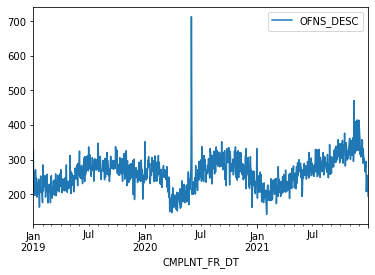

In [28]:
# plot as a time series
crime_daily.plot()

### 2. plotting on borough and zip code level normalized by population

In [29]:
#get the population of different borough
Borough_pop=zips.groupby(by=['COUNTY']).agg({'POPULATION':'sum'})

In [30]:
Borough_pop

,POPULATION
COUNTY,
Bronx,1431301.0
Kings,2548896.0
New York,1687421.0
Queens,2262768.0
Richmond,468220.0


In [31]:
# group crime numbers by borough and normalize by their population (per 100,000). Population is given in the zips shapefile
borough_data=taxi_df.groupby(by=['COUNTY']).agg({'OFNS_DESC':'count'})

borough_data['crime_level']=borough_data['OFNS_DESC']/Borough_pop['POPULATION']*100000
borough_data


,OFNS_DESC,crime_level
COUNTY,,
Bronx,62081,4337.382563
Kings,80756,3168.273637
New York,77622,4600.037572
Queens,59220,2617.148554
Richmond,7278,1554.397505


<AxesSubplot:xlabel='COUNTY'>

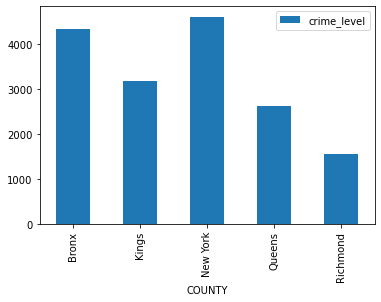

In [32]:
# plot as a bar plot
borough_data.plot.bar(y=['crime_level'])

In [33]:
# now group by zip codes, normalize by their population
zip_data=taxi_df.groupby(by=['ZIPCODE']).agg({'OFNS_DESC':'count'})

zip_data=zips.merge(zip_data, left_on='ZIPCODE', right_on='ZIPCODE',how='right')

zip_data['crime_level']=zip_data['OFNS_DESC']/zip_data['POPULATION']*100000
zip_data


,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry,OFNS_DESC,crime_level
0,00083,0,Central Park,25.0,3.830099e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((-73.94922 40.79691, -73.94932 40.796...",196,784000.000000
1,10001,0,New York,22413.0,1.779494e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((-74.00827 40.75259, -74.00819 40.752...",4322,19283.451568
2,10002,0,New York,81305.0,2.628013e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((-73.97442 40.73642, -73.97445 40.736...",3703,4554.455446
3,10003,0,New York,55878.0,1.553838e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((-73.97986 40.73497, -73.98028 40.734...",3095,5538.852500
4,10004,0,New York,2187.0,4.002521e+06,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((-74.01101 40.70622, -74.00997 40.705...",247,11294.010059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,11693,0,Far Rockaway,11052.0,1.527599e+06,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((-73.83263 40.60841, -73.83292 40.608...",446,4035.468693
201,11693,0,Far Rockaway,11052.0,1.227092e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((-73.81336 40.59096, -73.81332 40.590...",446,4035.468693
202,11693,0,Far Rockaway,11052.0,3.497516e+06,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((-73.84076 40.62536, -73.84306 40.627...",446,4035.468693
203,11694,0,Rockaway Park,20163.0,4.810161e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((-73.81935 40.58787, -73.81938 40.587...",363,1800.327332


<AxesSubplot:>

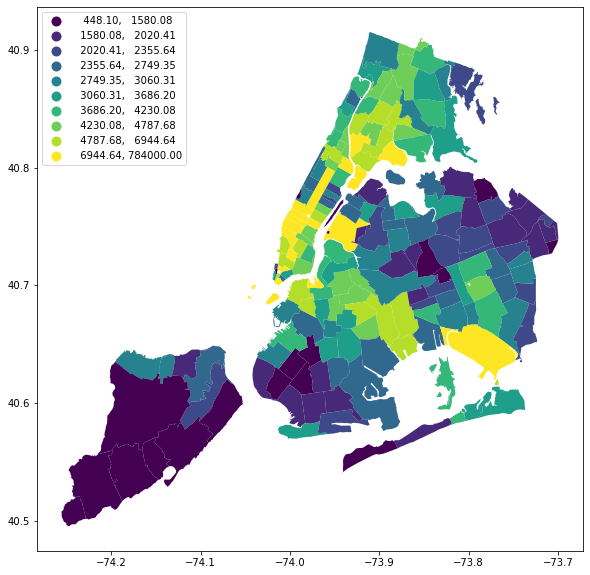

In [34]:
# plot as a heatmap with quantiles color scheme
#there are some area with 0 population，thus we get inf. filter the inf
zip_data=zip_data[(zip_data['crime_level']>0)&(zip_data['crime_level']<1000000)]
fig, ax = plt.subplots(1, figsize=(10,10))
zip_data.plot(ax=ax, column='crime_level', k=10, scheme='Quantiles', legend=True, legend_kwds={'loc': 'upper left'})

### 3. bar plots of total type 1 crimes vs a) months b) day of week and c) hour of day

In [35]:
# code here
taxi_df['Hour']=pd.to_datetime(taxi['CMPLNT_FR_TM'],errors = 'coerce')
taxi_df['Month'] = taxi_df['CMPLNT_FR_DT'].dt.month
taxi_df['DOW'] = taxi_df['CMPLNT_FR_DT'].dt.dayofweek
taxi_df['Hour'] = taxi_df['Hour'].dt.hour
taxi_df

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,OFNS_DESC,BORO_NM,PARKS_NM,Latitude,Longitude,geometry,index_right,...,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,Hour,Month,DOW
681150,123171799,2021-12-31,21:15:00,FELONY ASSAULT,BRONX,NaN,40.817877,-73.865994,POINT (-73.86599 40.81788),40.0,...,NY,Bronx,36,005,http://www.usps.com/,0.0,0.0,21,12,4
681170,725872999,2021-12-21,23:00:00,ARSON,BRONX,NaN,40.859744,-73.826259,POINT (-73.82626 40.85974),15.0,...,NY,Bronx,36,005,http://www.usps.com/,0.0,0.0,23,12,1
681210,195931501,2019-12-30,19:20:00,GRAND LARCENY,MANHATTAN,NaN,40.759428,-73.973467,POINT (-73.97347 40.75943),193.0,...,NY,New York,36,061,http://www.usps.com/,0.0,0.0,19,12,0
681252,696904327,2019-12-29,13:15:00,GRAND LARCENY OF MOTOR VEHICLE,BROOKLYN,NaN,40.674397,-73.951466,POINT (-73.95147 40.67440),183.0,...,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,13,12,6
681332,730604096,2021-12-26,12:00:00,GRAND LARCENY,BRONX,NaN,40.824075,-73.908711,POINT (-73.90871 40.82407),34.0,...,NY,Bronx,36,005,http://www.usps.com/,0.0,0.0,12,12,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2555623,161753679,2020-01-01,18:05:00,ROBBERY,BRONX,NaN,40.823424,-73.901583,POINT (-73.90158 40.82342),34.0,...,NY,Bronx,36,005,http://www.usps.com/,0.0,0.0,18,1,2
2555627,818450575,2020-01-09,23:45:00,GRAND LARCENY,BROOKLYN,NaN,40.614192,-73.933173,POINT (-73.93317 40.61419),132.0,...,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,23,1,3
2555632,871565580,2020-01-05,19:30:00,ROBBERY,BRONX,NaN,40.887108,-73.913308,POINT (-73.91331 40.88711),14.0,...,NY,Bronx,36,005,http://www.usps.com/,0.0,0.0,19,1,6
2555633,633539817,2020-01-09,16:14:00,GRAND LARCENY,MANHATTAN,NaN,40.725191,-73.998122,POINT (-73.99812 40.72519),95.0,...,NY,New York,36,061,http://www.usps.com/,0.0,0.0,16,1,3


<AxesSubplot:xlabel='Month'>

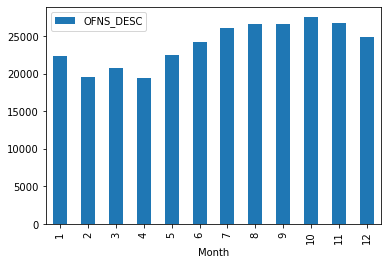

In [36]:
#bar plots of total type 1 crimes vs a) months
month_data=taxi_df.groupby(by=['Month']).agg({'OFNS_DESC':'count'})
month_data.plot.bar()

<AxesSubplot:xlabel='DOW'>

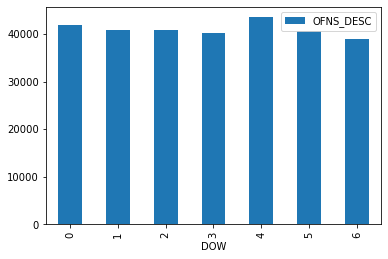

In [37]:
dow_data=taxi_df.groupby(by=['DOW']).agg({'OFNS_DESC':'count'})
dow_data.plot.bar()

<AxesSubplot:xlabel='Hour'>

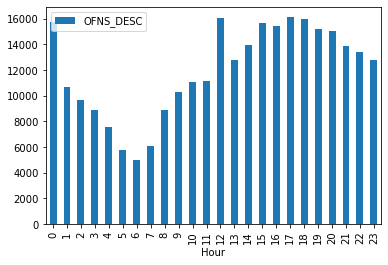

In [38]:
hour_data=taxi_df.groupby(by=['Hour']).agg({'OFNS_DESC':'count'})
hour_data.plot.bar()

### 4. Bar plots: Felony assault vs grand larceny grouped by a) day of week and b) hour of day

In [39]:
# filter data for above crime types
grand_larceny=taxi_df[taxi_df['OFNS_DESC']=='GRAND LARCENY']
felony_assault=taxi_df[taxi_df['OFNS_DESC']=='FELONY ASSAULT']

In [40]:
#normalized by the crime area‘s population
# group the numbers and normalize by total city population (per 100,000)
#by day of week
totalpop=sum(zips['POPULATION'])
totalpop
grand_larceny_dow1=grand_larceny.groupby(by=['DOW']).agg({'OFNS_DESC':'count','POPULATION':'sum'}).reset_index()
grand_larceny_dow1['crime_level']=grand_larceny_dow1['OFNS_DESC']/totalpop*100000
felony_assault_dow1=felony_assault.groupby(by=['DOW']).agg({'OFNS_DESC':'count','POPULATION':'sum'}).reset_index()
felony_assault_dow1['crime_level']=felony_assault_dow1['OFNS_DESC']/totalpop*100000




In [41]:
#by hour of day
grand_larceny_hour1=grand_larceny.groupby(by=['Hour']).agg({'OFNS_DESC':'count','POPULATION':'sum'}).reset_index()
grand_larceny_hour1['crime_level']=grand_larceny_hour1['OFNS_DESC']/totalpop*100000


felony_assault_hour1=felony_assault.groupby(by=['Hour']).agg({'OFNS_DESC':'count','POPULATION':'sum'}).reset_index()
felony_assault_hour1['crime_level']=felony_assault_hour1['OFNS_DESC']/totalpop*100000

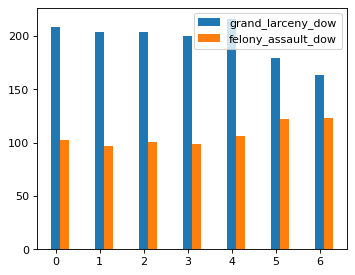

In [42]:
bar_width = 0.2
plt.figure(figsize=(5,4),dpi=80)
plt.bar(grand_larceny_dow1['DOW'],grand_larceny_dow1['crime_level'],label='grand_larceny_dow',width=0.2)
plt.bar(felony_assault_dow1['DOW']+bar_width ,felony_assault_dow1['crime_level'],label='felony_assault_dow',width=0.2)
plt.legend()
plt.show()

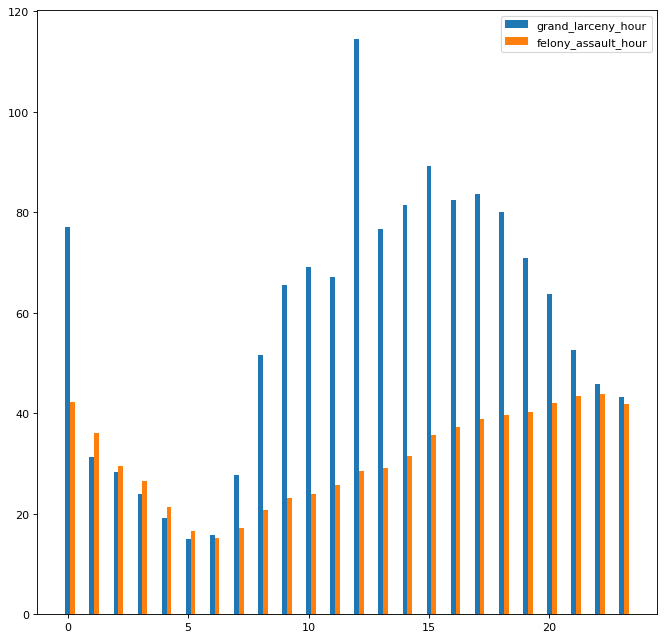

In [43]:
bar_width = 0.2
plt.figure(figsize=(10,10),dpi=80)
plt.bar(grand_larceny_hour1['Hour'],grand_larceny_hour1['crime_level'],label='grand_larceny_hour',width=0.2)
plt.bar(felony_assault_hour1['Hour']+bar_width ,felony_assault_hour1['crime_level'],label='felony_assault_hour',width=0.2)
plt.legend()
plt.show()

### 5. comparing the %% decomposition of type 1 crimes by category of crime

for matplotlib pie charts documentation: https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html

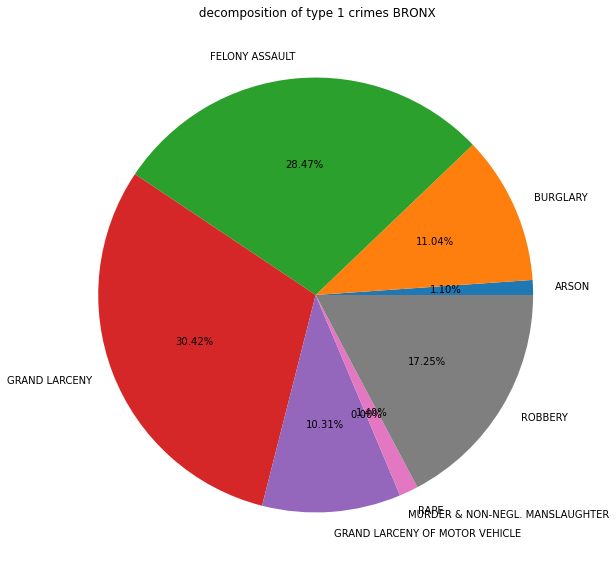

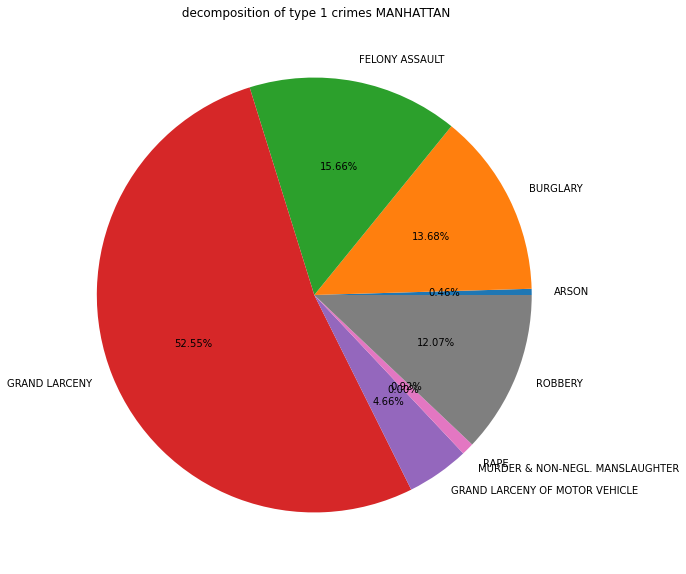

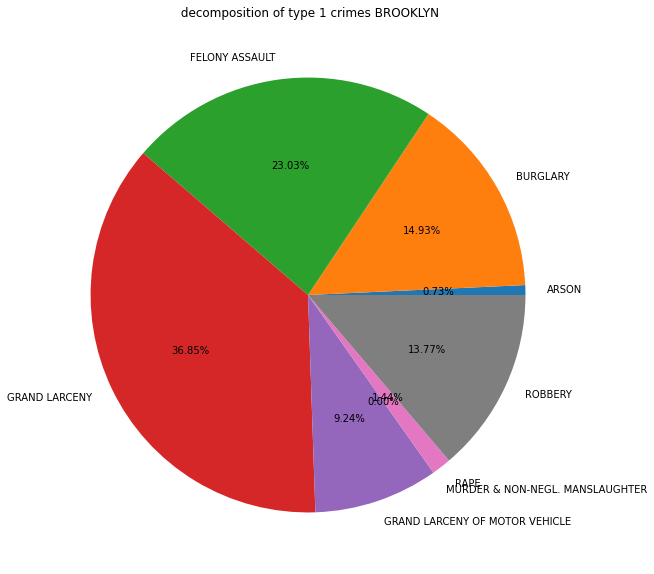

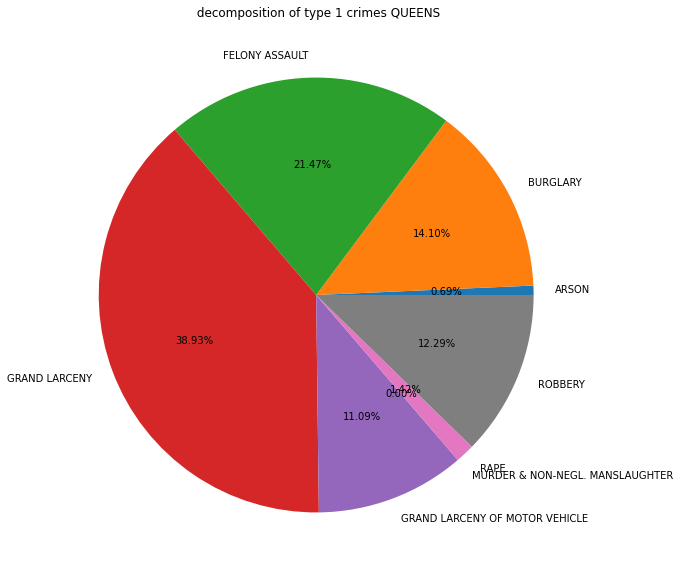

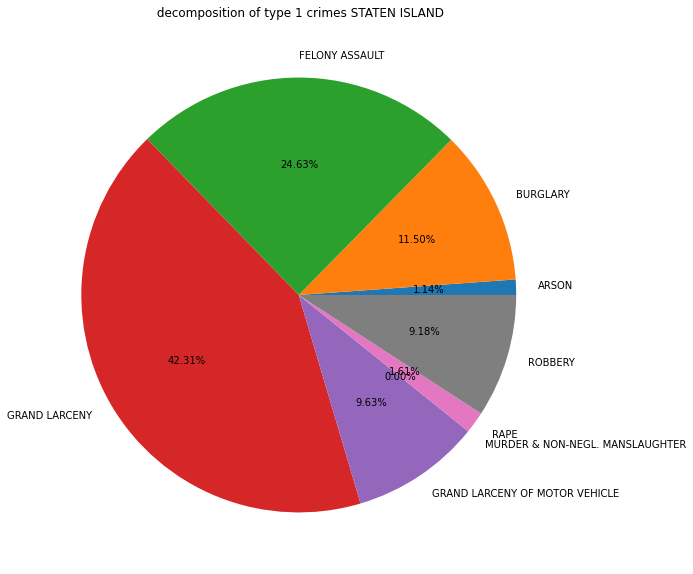

In [44]:
# plot 5 pie charts for each borough depicting % of each crime type within type 1 crimes

for boro in taxi_df.BORO_NM.unique():
    data2=taxi_df[taxi_df['BORO_NM']==boro]
    labels=['ARSON', 'BURGLARY', 'FELONY ASSAULT', 'GRAND LARCENY' ,'GRAND LARCENY OF MOTOR VEHICLE', 'MURDER & NON-NEGL. MANSLAUGHTER', 'RAPE', 'ROBBERY']
    X=[len(data2[data2['OFNS_DESC']=='ARSON']),len(data2[data2['OFNS_DESC']=='BURGLARY']),len(data2[data2['OFNS_DESC']=='FELONY ASSAULT']),len(data2[data2['OFNS_DESC']=='GRAND LARCENY']),len(data2[data2['OFNS_DESC']=='GRAND LARCENY OF MOTOR VEHICLE']),len(data2[data2['OFNS_DESC']=='MURDER & NON-NEGL. MANSLAUGHTER']),len(data2[data2['OFNS_DESC']=='RAPE']),len(data2[data2['OFNS_DESC']=='ROBBERY'])]  
    # complete this code here
    fig = plt.figure(figsize=(10,10))
    plt.pie(X,labels=labels,autopct='%1.2f%%') 
    plt.title(" decomposition of type 1 crimes"+" "+boro)
    plt.show() 


## Section 3 - Hypothesis testing tasks

1. Plot the distribution (density plot) of daily number of total type 1 crimes for 2019.
Test the hypothesis if the distribution follows normal distribution.

2. Plot the distributions (density plots) of daily number of total type 1 crimes for weekdays and weekends (normalized by population) and perform a) the t-test for the hypothesis that the average daily crime over weekdays and weekends is the same, b) the KS-test for the hypothesis that the weekday and weekend daily crime numbers follow the same distribution. Can you reject either hypothesis at the 10% significance level? 

### 1. plotting distributions and normality test

In [45]:
#introduce the function performing distribution analysis
#introduce a custom function performing distribution analysis
def distribution_analysis(x, log_scale = False, fit_distribution = 'None', bins = 50, vis_means = True, vis_curve = True, print_outputs = True):
    #x - array of observations
    #log_scale - analyze distribution of log(x) if True
    #fit_distribution - fit the distribution ('normal', 'gev' or 'pareto') or do nothing if 'None'
    #bins - how many bins to use for binning the data
    #vis_means - show mean and std lines if True
    #vis_curve - show interpolated distribution curve over the histogram bars if True
    #print_outputs - print mean, std and percentiles
    
    if log_scale: 
        x1 = np.log10(x) #convert data to decimal logarithms
        xlabel = 'log(values)' #reflect in x labels
    else:
        x1 = x #leave original scale 
        xlabel = 'values'
    mu = x1.mean() #compute the mean
    if log_scale: #if logscale, output all three - log mean, its original scale and original scale mean
        print('Log mean = {:.2f}({:.2f}), mean = {:.2f}'.format(mu,10**mu,x.mean()))
    else:
        print('Mean = {:.2f}'.format(mu)) #otherwise print mean
    sigma = x1.std() #compute and output standard deviation 
    print('Standard deviation = {:.2f}'.format(sigma))
    for p in [1,5,25,50,75,95,99]: #output percentile values
        print('{:d} percentile = {:.2f}'.format(p,np.percentile(x,p)))
        
    #visualize histogram and the interpolated line (if vis_curve=True) using seaborn
    sns.distplot(x1, hist=True, kde=vis_curve, 
        bins=bins,color = 'darkblue', 
        hist_kws={'edgecolor':'black'},
        kde_kws={'linewidth': 4})
    
    #show vertical lines for mean and std if vis_means = True
    if vis_means:
        plt.axvline(mu, color='r', ls='--', lw=2.0)
        plt.axvline(mu-sigma, color='g', ls='--', lw=2.0)
        plt.axvline(mu+sigma, color='g', ls='--', lw=2.0)
        
    ylim = plt.gca().get_ylim() #keep the y-range of original distribution density values 
    #(to make sure the fitted distribution would not affect it)
    
    h = np.arange(mu - 3 * sigma, mu + 3 * sigma, sigma / 100) #3-sigma visualization range for the fitted distribution
    pars = None #fitted distribution parameters
    
    #fit and visualize the theoretic distribution
    if fit_distribution == 'normal':
        pars = norm.fit(x1)
        plt.plot(h,norm.pdf(h,*pars),'r')
    elif fit_distribution == 'gev':
        pars = gev.fit(x1)
        plt.plot(h,gev.pdf(h,*pars),'r')
    elif fit_distribution == 'pareto':
        pars = pareto.fit(x1)
        plt.plot(h,pareto.pdf(h,*pars),'r')
    
    plt.xlabel(xlabel) #add x label 
    plt.ylim(ylim) #restore the y-range of original distribution density values 
    plt.show()
    return pars

In [46]:
# group type 1 crime numbers per day for 2019
distribution_data=taxi_df[(taxi_df['CMPLNT_FR_DT']>='2019-1-1')&(taxi_df['CMPLNT_FR_DT']<='2019-12-31')]
distribution_data=distribution_data.groupby(by='CMPLNT_FR_DT').agg({'OFNS_DESC':'count'})

Mean = 256.40
Standard deviation = 33.06
1 percentile = 181.76
5 percentile = 201.20
25 percentile = 233.00
50 percentile = 260.00
75 percentile = 280.00
95 percentile = 306.00
99 percentile = 326.72


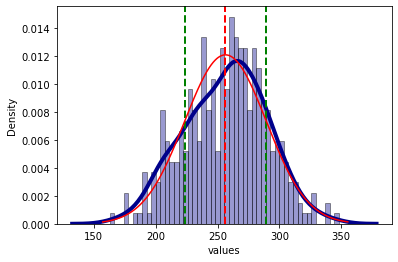

(256.4, 33.017205975232955)

In [47]:
# plot the distribution (density plot)
distribution_analysis(distribution_data['OFNS_DESC'],fit_distribution='normal')

In [48]:
# normality test
def is_normal(x): #check is the distribution is normal using one-sample KS test and sample mean-std
    return stats.kstest(x,'norm',args=(x.mean(),x.std()))

In [49]:
is_normal(distribution_data['OFNS_DESC'])
#because the p value is >0.05 so it is normal in 95% confidence interval

KstestResult(statistic=0.050202302490058526, pvalue=0.3061629917379186)

### 2. weekdays vs weekend distribution

In [50]:
# create dataframes for weekdays and weekends
weekdays=taxi_df[taxi_df['DOW']<=4]
weekends=taxi_df[taxi_df['DOW']>=5]
#Plot the distributions (density plots) of daily number of total type 1 crimes for weekdays and weekends (normalized by population)
#perform a) the t-test for the hypothesis that the average daily crime over weekdays and weekends is the same
#b) the KS-test for the hypothesis that the weekday and weekend daily crime numbers follow the same distribution. 
#Can you reject either hypothesis at the 10% significance level?


In [51]:
totalpop

8398606.0

In [52]:
# group daily numbers for weekdays and weekends
weekdays_daily=weekdays.groupby(by='CMPLNT_FR_DT').agg({'OFNS_DESC':'count'})
weekends_daily=weekends.groupby(by='CMPLNT_FR_DT').agg({'OFNS_DESC':'count'})

Mean = 3.15
Standard deviation = 0.56
1 percentile = 1.95
5 percentile = 2.31
25 percentile = 2.79
50 percentile = 3.16
75 percentile = 3.46
95 percentile = 3.99
99 percentile = 4.62


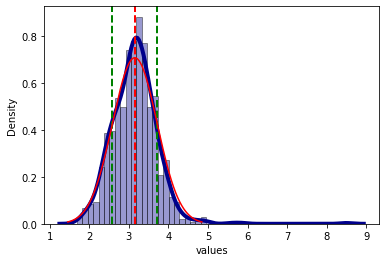

Mean = 3.04
Standard deviation = 0.52
1 percentile = 1.91
5 percentile = 2.15
25 percentile = 2.68
50 percentile = 3.08
75 percentile = 3.38
95 percentile = 3.87
99 percentile = 4.28


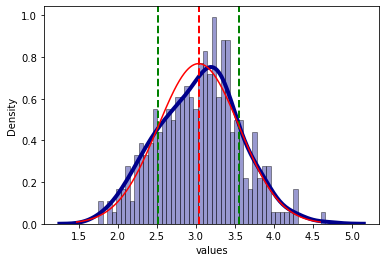

(3.0370195683939416, 0.5194593052726789)

In [53]:
#using normalized scale by 
weekdays_daily['crime_level']=weekdays_daily['OFNS_DESC']/totalpop*100000
weekends_daily['crime_level']=weekends_daily['OFNS_DESC']/totalpop*100000
distribution_analysis(weekdays_daily['crime_level'],fit_distribution='normal')
distribution_analysis(weekends_daily['crime_level'],fit_distribution='normal')

In [54]:
# t-test
stats.ttest_ind(weekdays_daily['crime_level'],
                weekends_daily['crime_level'])

Ttest_indResult(statistic=3.0408810406442592, pvalue=0.0024150110240147554)

In [55]:
stats.ks_2samp(weekdays_daily['crime_level'],
                weekends_daily['crime_level'])

KstestResult(statistic=0.08634222919937205, pvalue=0.0668433305392736)

In [56]:
#because the all p value is smaller than 0.10 so we can reject either hypothesis at the 10% significance level.